<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%202%20-%20Regression/Section%208%20-%20Decision%20Tree%20Regression/Decision_Tree_Regressor_on_Position_salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/noushadkhan01/ML-and-DL-by-SuperDataScience.git

Cloning into 'ML-and-DL-by-SuperDataScience'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (258/258), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 258 (delta 82), reused 198 (delta 53), pack-reused 0
Receiving objects: 100% (258/258), 25.17 MiB | 17.74 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [2]:
%cd ML-and-DL-by-SuperDataScience/Machine-Learning/Part 2 - Regression/Section 8 - Decision Tree Regression/

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 2 - Regression/Section 8 - Decision Tree Regression


In [3]:
!ls

decision_tree_regression.py  Position_Salaries.csv   regression_template.R
decision_tree_regression.R   regression_template.py


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


# Train Model without Position for better visualisation

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [0]:
def my_visualisation(X, y , min_samples_split = 2, max_depth = 5, evaluate = 6.5, scaling = False, resolution_scale = 0.01):
  evaluate = np.array([[evaluate]])
  if scaling:
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X = sc_X.fit_transform(X)
    y = sc_y.fit_transform(y)
    X_grid = np.arange(min(X), max(X), resolution_scale)
    evaluate = sc_X.transform(evaluate)
 
  model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 0).fit(X, y)
  if not scaling:
      X_grid = np.arange(min(X.values), max(X.values), resolution_scale)
  X_grid = np.reshape(X_grid, (len(X_grid), 1))
  plt.figure(figsize = (10, 5))
  plt.scatter(X, y, color = 'green')
  plt.plot(X_grid, model.predict(X_grid), c = 'blue')
  plt.scatter(evaluate, model.predict(evaluate), c = 'red', marker = 'o')
  plt.title('Decision Tree Regressor in high resolution')
  plt.show()

In [39]:
X = df[['Level']]
X.head(2)

,Level
0,1
1,2


In [40]:
y = df[['Salary']]
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


##without scaling

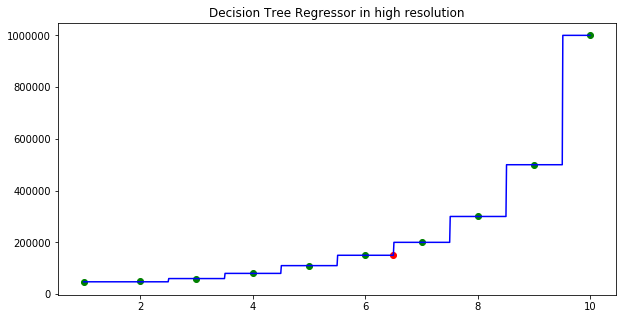

In [41]:
my_visualisation(X, y,evaluate = 6.5)

##with scaling

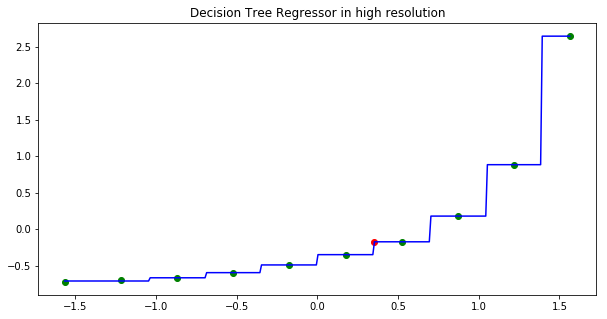

In [42]:
my_visualisation(X, y,evaluate = 6.5, scaling = True)

## min_samples_split
it will split the data if the data have min samples provided in min_samples_split argument ortherwise not

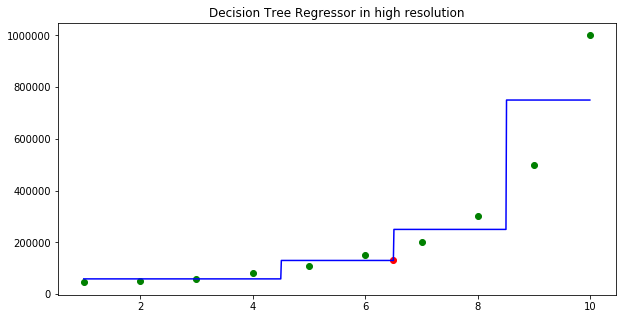

In [43]:
my_visualisation(X, y,evaluate = 6.5, min_samples_split = 5)

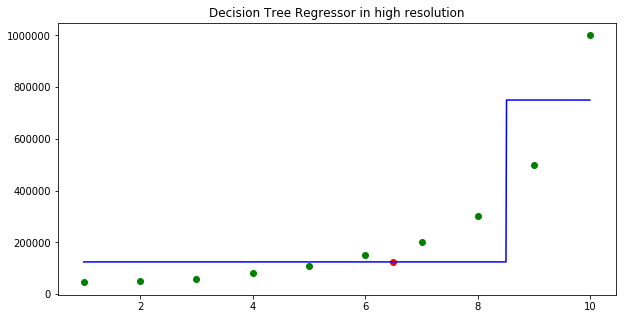

In [44]:
my_visualisation(X, y,evaluate = 6.5, min_samples_split = 10)